# SALES PREDICTION 

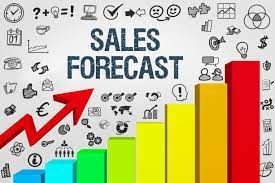

In [85]:
#IMPORTING NECESSARY LIBARIES
import numpy as np
import pandas as pd

In [86]:
#READING THE GIVEN CSV FILE
sales_predict = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\salespredection.csv')

In [87]:
#PRINTING THE CSV FILE
sales_predict

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [88]:
#PRINTING THE HEAD OF CSV FILE
sales_predict.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [90]:
#INFORMATION ABOUT THE DATAFRAME
sales_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [91]:
#GETTING THE CURRENT SHAPE OF AN ARRAY
sales_predict.shape

(200, 4)

In [92]:
#GENERATING STATISTICAL DESCRIPTION OF A SERIES OBJECT
sales_predict.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# DATA VISUALISATION


In [96]:
# IMPORTING LIBARIES FOR VISUALISING THE DATA
import matplotlib.pyplot as plt 
import seaborn as sns

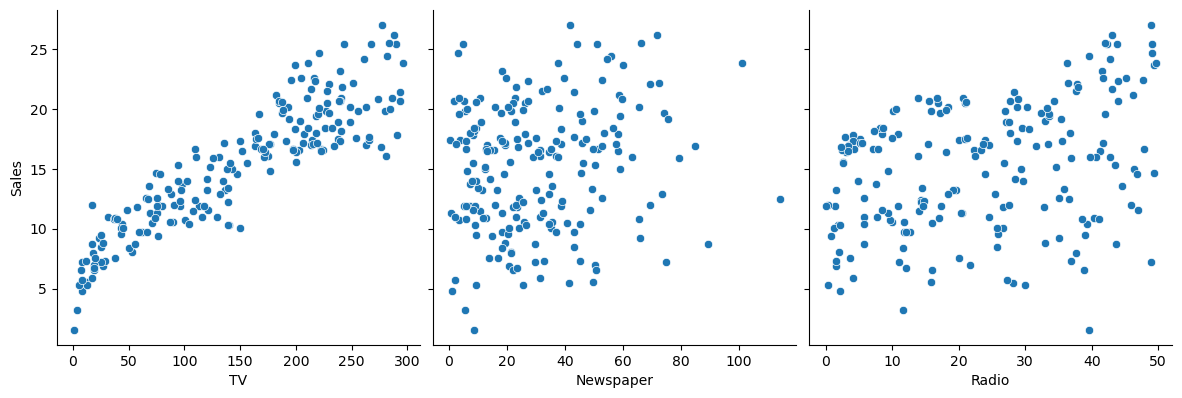

In [97]:
#PLOTTING A PAIRWISE RELATIONSHIP IN DATAFRAME
sns.pairplot(sales_predict, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

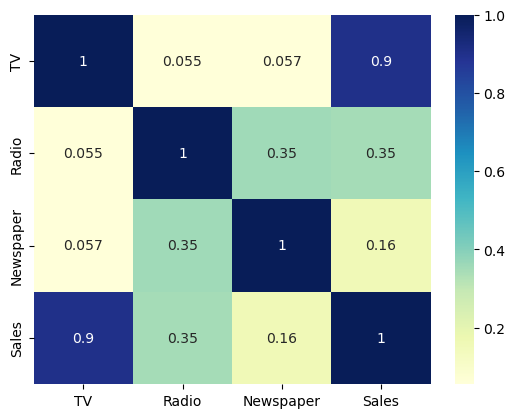

In [98]:
#REPRESENTING VALUES IN COLORS
sns.heatmap(sales_predict.corr(), cmap="YlGnBu", annot = True)
plt.show()

# LINEARREGRESSION

In [104]:
#IMPORTING TRAIN_TEST_SPLIT
from sklearn.model_selection import train_test_split

In [105]:
X = sales_predict['TV']
y = sales_predict['Sales']

In [108]:
#TRAINING AND FITTING THE MODEL
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [109]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [110]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

# BUILDING A LNEAR MODEL

In [112]:
#TO ESTIMATE STATISTICAL MODELS , CONDUCTING STATISTICAL TESTS AND STATISTICAL DATA EXPLORATION
import statsmodels.api as sm

In [113]:
X_train_sm = sm.add_constant(X_train)

In [115]:
#FIT THE REGRESSION USING 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
#PRINTING THE PARAMETERS
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [116]:
#LISTING OUT ALL THE DIFFERENT PARAMETERS OF THE REGRESSION LINE FITTED
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.52e-52
Time:                        22:11:08   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

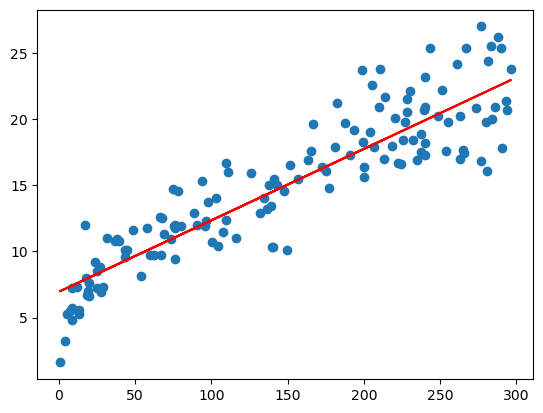

In [117]:
#REPRESENTATION OF HOW TWO VARIABLES RELATED TO EACH OTHER
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

# RESIDUAL  ANALYSIS

In [121]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

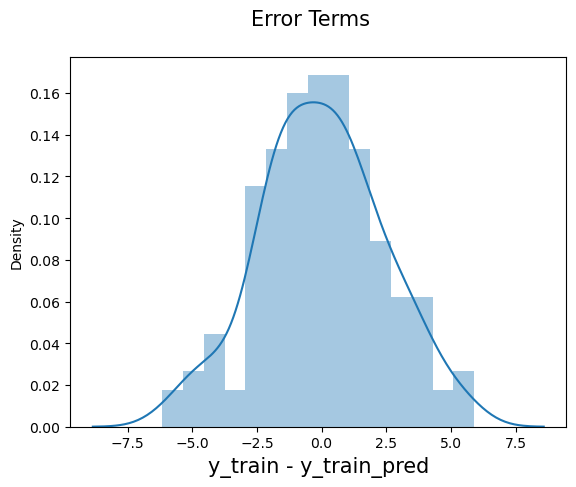

In [122]:
#CREATING A NEW FIGURE
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_train - y_train_pred', fontsize = 15)        
plt.show()

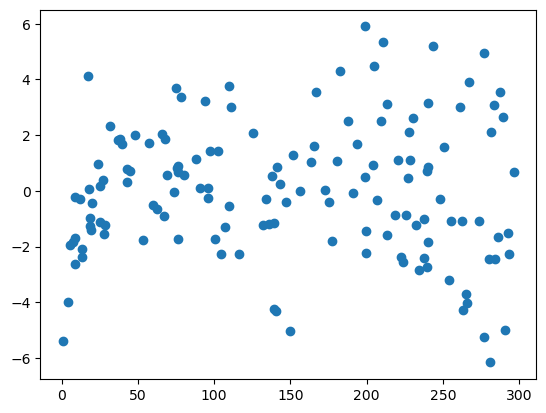

In [123]:
#LOOKING FOR PATTERN IN RESIDUALS
plt.scatter(X_train,res)
plt.show()

# PREDICTIONS ON TEST SET

In [127]:
#ADD A CONSTANT TO X_test
X_test_sm = sm.add_constant(X_test)

In [128]:
# PREDICT THE y VALUES CORRESPONDING TO X_test_sm
y_pred = lr.predict(X_test_sm)
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [129]:
#IMPORTING LIBARIS TO MEASURE THE ERRORS 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [130]:
#RETURNS THE MEAN SQUARE ERROR SO WE WILL TAKE SQUARE ROOT
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [132]:
#REPRESENTING HOW REGRESSION LINE FITS TO DATAPOINTS
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245659

# DATAVISULASATION ON TEST SET

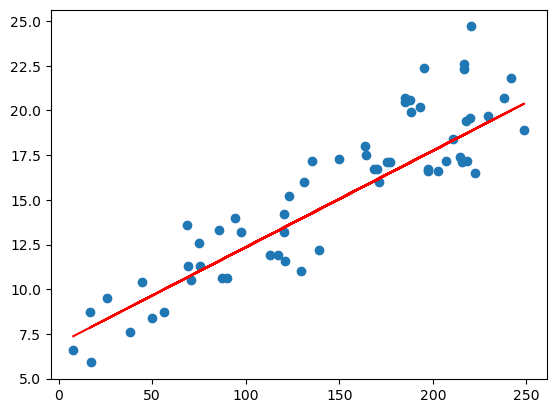

In [133]:
#REPRESENTATION OF HOW TWO VARIABLES RELATED TO EACH OTHER
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

# LINEARREGREESION USING LINEAR_MODEL IN SKLEARN

In [134]:
#IMPORTING TRAIN_TEST_SPLIT
from sklearn.model_selection import train_test_split

In [136]:
#TRAINING AND FITTING THE MODEL
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [137]:
#GETTING THE CURRENT SHAPE OF AN TRAINED ARRAY
X_train_lm.shape

(140,)

In [138]:
#RESHAPING THE TRAINED ARRAY
X_train_lm = np.array(X_train_lm).reshape(-1, 1)
X_test_lm = np.array(X_test_lm).reshape(-1, 1)

In [140]:
#PRINTING THE SHAPE OF AN TRAINED ARRAY
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [141]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [142]:
#CHECKING INTERCEPT AND COEFF 
print(lm.intercept_)
print(lm.coef_)

6.948683200001357
[0.05454575]


In [143]:
#CALCULATING THE NUMPY CORRELATION COEFFICIENT OF TWO 1-D DATAPOINTS
corrs = np.corrcoef(X_train, y_train)
print(corrs)

[[1.         0.90321277]
 [0.90321277 1.        ]]


In [144]:
corrs[0,1] ** 2

0.8157933136480384

# STANDARD SCALING

In [145]:
#WE WILL REBUILD THE MODEL AFTER SCALING THE PREDICTOR AND SEE WHAT CHANGES
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# SCALING UTILITES HANDY

In [146]:
#IMPORTING SCALING UTILITES
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [147]:
#RESHAPING THE 'X_trained_scaled' and 'y_trained_scaled' DATA IN ORDER TO PERFORM THE STANDARDISATION
X_train_scaled = np.array(X_train).reshape(-1, 1)
y_train_scaled = np.array(y_train).reshape(-1, 1)

In [148]:
X_train_scaled.shape

(140, 1)

In [150]:
# CREATE A SCALER OBJECT USING STANDARDSCALER()
scaler = StandardScaler()
# FIT AND TRANSFORM THE TRAIN SET
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [151]:
#CALCULATING MEAN AND STANDARDDEVIATION
print("mean and sd for X_train_scaled:", np.mean(X_train_scaled), np.std(X_train_scaled))
print("mean and sd for y_train_scaled:", np.mean(y_train_scaled), np.std(y_train_scaled))

mean and sd for X_train_scaled: 2.5376526277146434e-17 1.0
mean and sd for y_train_scaled: -3.8064789415719653e-17 1.0


In [152]:
#FITTING THE REGRESSION LINE 
X_train_scaled = sm.add_constant(X_train_scaled)

In [153]:
#CHECKING THE PARAMETERS
lr_scaled = sm.OLS(y_train_scaled, X_train_scaled).fit()
lr_scaled.params

array([-1.38777878e-17,  9.03212773e-01])

In [155]:
# LOOKING THE STATISTICS OF THE MODEL IF ANY ASPECTS OF THE MODEL HAS CHANGES
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.52e-52
Time:                        22:49:18   Log-Likelihood:                -80.233
No. Observations:                 140   AIC:                             164.5
Df Residuals:                     138   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.388e-17      0.037   -3.8e-16      1.0